# Regressão 01 - tarefa 03 - transformações em X e Y

#### Carregue os pacotes necessários e a base de gorjetas.

In [1]:
import pandas as pd
import seaborn as sns
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

## I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

### 1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, explicada por sex, smoker, diner e net_bill.

In [3]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)

### 2. Remova as variáveis não significantes

In [4]:
# PARTE 1: Avaliando significância:
reg =  sm.OLS(y,X).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
No. Observations:                 244   F-statistic:                     30.13
Covariance Type:            nonrobust   Prob (F-statistic):           2.64e-20
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style="color: blue;">Resposta: Vemos no summary que nem 'sex', nem 'smoker', nem 'time' tem P>|t| abaixo de 5%, ou seja, nenhuma delas é estatisticamente significante.</span>

In [5]:
# PARTE 2: Removendo as variáveis não siginificantes.
y, X = patsy.dmatrices('tip ~ net_bill', tips)
reg =  sm.OLS(y,X).fit()

### 3. Observe o gráfico de resíduos em função de net_bill

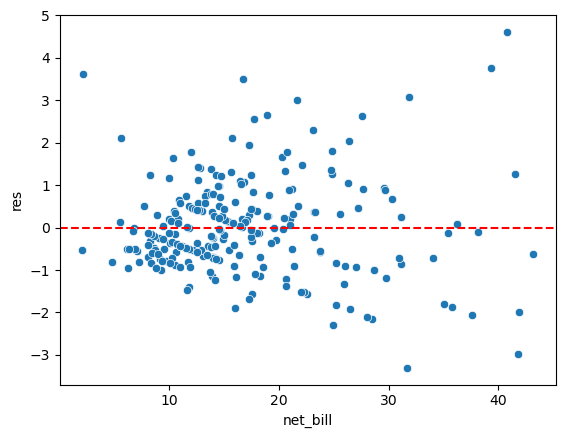

In [6]:
tips['res'] = reg.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### 4. Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [7]:
#PARTE 1: transformando em log
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', tips)
reg =  sm.OLS(y,X).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
No. Observations:                 244   F-statistic:                     101.0
Covariance Type:            nonrobust   Prob (F-statistic):           4.40e-20
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
====================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#PARTE 2: transformando em polinomio
y, X = patsy.dmatrices('tip ~ net_bill + np.power(net_bill,2)', tips)
reg =  sm.OLS(y,X).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
No. Observations:                 244   F-statistic:                     60.55
Covariance Type:            nonrobust   Prob (F-statistic):           4.96e-22
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
=========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <span style="color: blue;"> Resposta: Entre os dois modelos, o polinômio é melhor, pois possui o R-quared de maior valor.</span>

## II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

### 1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

In [9]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)

### 2. Remova as variáveis não significantes

In [10]:
# PARTE 1: Avaliando significância:
reg =  sm.OLS(y,X).fit()
R21 = reg.rsquared
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
No. Observations:                 244   F-statistic:                     27.25
Covariance Type:            nonrobust   Prob (F-statistic):           1.21e-18
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style="color: blue;">Resposta: Vemos no summary que nem 'sex', nem 'smoker', nem 'time' tem P>|t| abaixo de 5%, ou seja, nenhuma delas é estatisticamente significante.</span>

In [11]:
# PARTE 2: Removendo as variáveis não siginificantes.
y, X = patsy.dmatrices('tip ~ net_bill', tips)
reg =  sm.OLS(y,X).fit()

### 3. Observe o gráfico de resíduos em função de net_bill

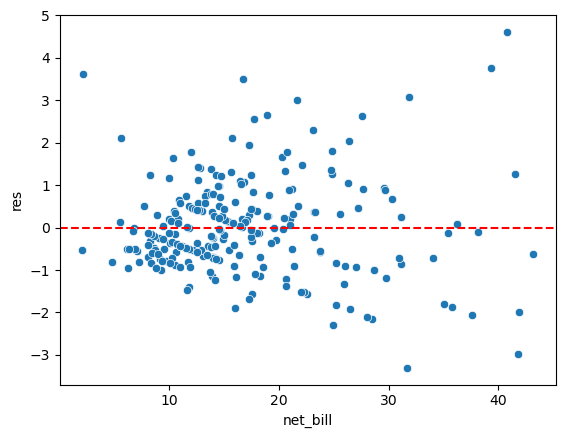

In [12]:
tips['res'] = reg.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### 4. teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [13]:
#PARTE 1: transformando em log
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', tips)
reg =  sm.OLS(y,X).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
No. Observations:                 244   F-statistic:                     113.5
Covariance Type:            nonrobust   Prob (F-statistic):           5.62e-22
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
====================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#PARTE 2: transformando em polinômio
y, X = patsy.dmatrices('np.log(tip) ~ net_bill + np.power(net_bill,2)', tips)
reg =  sm.OLS(y,X).fit()
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
No. Observations:                 244   F-statistic:                     61.39
Covariance Type:            nonrobust   Prob (F-statistic):           2.82e-22
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
=========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <span style="color: blue;"> Entre os dois modelos, o polinômio é melhor, pois possui o R-quared de maior valor.</span>

### 5. Do modelo final deste item, calcule o R² na escala de tip (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [15]:
# Calculo R2 na escala de tip (sem log)
tips['pred_y'] = np.exp(reg.fittedvalues)
r2 = tips[['pred_y', 'tip']].corr().iloc[0,1]**2
tips[['pred_y', 'tip']].corr().iloc[0,1]

# Retornando o resultado
print("O R2 do modelo final é {:.2%}, enquanto o R2 do modelo do item 1 é {:.2%}".format(r2,R21))

if r2 > R21:
    print("Sendo assim, o melhor modelo é o modelo final.")
else:
    print("Sendo assim, o melhor modelo é o modelo do item 1.")

O R2 do modelo final é 32.91%, enquanto o R2 do modelo do item 1 é 31.32%
Sendo assim, o melhor modelo é o modelo final.


## III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

In [16]:
df = pd.read_csv('previsao_de_renda.csv')

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

### 1. Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário. 

In [17]:
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()

### 2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

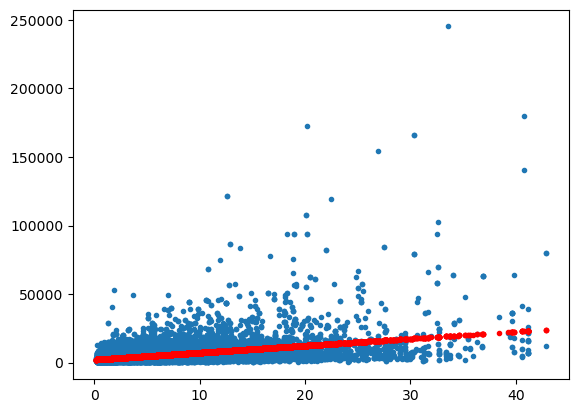

In [18]:
# Visualizando a plotagem do gráfico:
df['renda_pred'] = reg.fittedvalues
plt.plot(df['tempo_emprego'], df['renda'], '.') #distribuição real
plt.plot(df['tempo_emprego'], df['renda_pred'], 'r.') #distribuição prevista
r21 = reg.rsquared

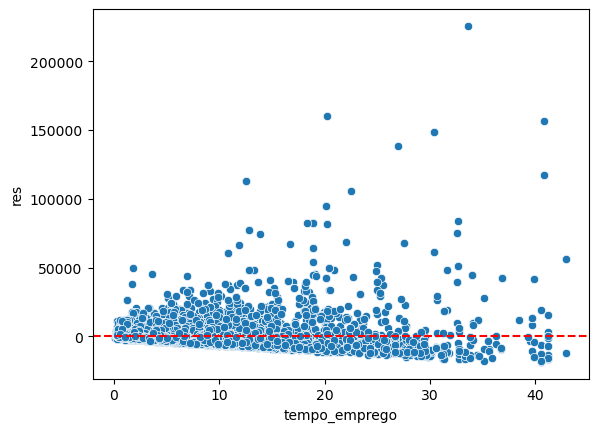

In [19]:
# Visualizando a plotagem dos resíduos:
df['res'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

#### <span style="color: blue;"> Resposta: Eu faria a adição de novas variáveis que pudessem explicar o porque alguns resíduos se encontram acima de zero no início e abaixo de zero no final.</span>

### 3. Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

In [20]:
reg = smf.ols('''renda ~ tempo_emprego + data_ref 
                + posse_de_veiculo + posse_de_imovel 
                + qtd_filhos + tipo_renda + educacao 
                + estado_civil + tipo_residencia
                + idade + qt_pessoas_residencia''', data = df).fit()

### 4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [21]:
reg.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
No. Observations:               12427   F-statistic:                     66.86
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -401.2428   2660.122     -0.151      0.880   -5615.495    4813.010
data_ref[T.2015-02-01]            -160.1563    399.351     -0.401      0.688    -942.945     622.633
data_ref[T.2015-03-01]              89.2776    400.391      0.223      0.824    -695.551     874.106
data_ref[T.2015-04-01]             567.2044    399.201      1.421      0.155    -215.292    1349.701
data_ref[T.2015-05-01]             107.6098    398.107      0.270      0.787    -672.742     887.962
data_ref[T.2015-06-01]             649.0406    399.771      1.624      0.105    -134.574    1432.655
data_ref[T.2015-07-01]             295.3698    398.397      0.741      0.458    -485.550    1076.290
data_ref[T.2015-08-01]             143.1482    399.762      0.358      0.720    -640.447     926.744
data_ref[T.2015-09-01]             116.5497    397.083      0.294      0.769    -661.796     894.895
data_ref[T.2015-10-01]             292.8241    399.796      0.732      0.464    -490.839    1076.487
data_ref[T.2015-11-01]             474.3777    399.983      1.186      0.236    -309.650    1258.406
data_ref[T.2015-12-01]             538.9198    401.358      1.343      0.179    -247.804    1325.644
data_ref[T.2016-01-01]             265.7236    399.735      0.665      0.506    -517.820    1049.267
data_ref[T.2016-02-01]             -41.6507    399.645     -0.104      0.917    -825.016     741.715
data_ref[T.2016-03-01]             209.2826    403.174      0.519      0.604    -581.001     999.566
posse_de_veiculo[T.True]          1873.6904    151.365     12.379      0.000    1576.992    2170.389
posse_de_imovel[T.True]            165.9534    157.519      1.054      0.292    -142.809     474.716
tipo_renda[T.Bolsista]           -2311.8970   2717.499     -0.851      0.395   -7638.618    3014.824
tipo_renda[T.Empresário]           504.0770    168.065      2.999      0.003     174.643     833.511
tipo_renda[T.Pensionista]        -2339.5235   2718.549     -0.861      0.389   -7668.302    2989.255
tipo_renda[T.Servidor público]    -220.0833    250.307     -0.879      0.379    -710.725     270.558
educacao[T.Pós graduação]         -753.0423   1790.873     -0.420      0.674   -4263.431    2757.346
educacao[T.Secundário]              -7.9434    811.261     -0.010      0.992   -1598.141    1582.254
educacao[T.Superior completo]      252.8759    814.167      0.311      0.756   -1343.019    1848.771
educacao[T.Superior incompleto]   -450.2210    876.532     -0.514      0.608   -2168.360    1267.918
estado_civil[T.Separado]           156.7172   1253.390      0.125      0.900   -2300.123    2613.557
estado_civil[T.Solteiro]           209.5259   1227.230      0.171      0.864   -2196.036    2615.088
estado_civil[T.União]             -914.0624    283.482     -3.224      0.001   -1469.732    -358.393
estado_civil[T.Viúvo]             -977.1923   1301.745     -0.751      0.453   -3528.815    1574.431
tipo_residencia[T.Casa]          -1405.9763    609.551     -2.307      0.021   -2600.792    -211.161
tipo_residencia[T.Com os pais]   -1237.0583    680.159     -1.819      0.069   -2570.276      96.159
tipo_residencia[T.Comunitário]   -1963.4149 

In [22]:
# Reajustando apenas com variáveis significantes
reg = smf.ols('''renda ~ tempo_emprego + posse_de_veiculo 
                + (tipo_renda == "Empresário")
                + (estado_civil == "União")
                + qtd_filhos + idade
                + qt_pessoas_residencia'''
              , data = df).fit()
reg.summary(slim=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
No. Observations:               12427   F-statistic:                     348.4
Covariance Type:            nonrobust   Prob (F-statistic):               0.00
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -1141.1650    483.695     -2.359      0.018   -2089.283    -193.047
posse_de_veiculo[T.True]            1912.6090    150.649     12.696      0.000    1617.314    2207.904
tipo_renda == "Empresário"[T.True]   570.1065    163.427      3.488      0.000     249.765     890.448
estado_civil == "União"[T.True]     -914.0989    282.935     -3.231      0.001   -1468.694    -359.503
tempo_emprego                        519.1081     11.547     44.957      0.000     496.475     541.741
qtd_filhos                          -618.5343    219.623     -2.816      0.005   -1049.030    -188.039
idade                                 18.4300      8.577      2.149      0.032       1.618      35.242
qt_pessoas_residencia                830.5635    183.898      4.516      0.000     470.096    1191.031
======================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <span style="color: blue;"> Observações: </span>
Os parâmetros (tipo_residencia == "Casa") e era estatisticamente significantes no modelo acima. Porém, ao reduzir a quantidade de variáveis ele se tornaram estatisticamente insignificantes, e foram removidos por isso. O fenômeno oposto aconteceu com "qtd_filhos" e "qt_pessoas_residência", que eram estatisticamente insignificantes no modelo acima. Porém, com a retirada de outras variáveis, se tornaram estatisticamente significantes.

#### <span style="color: blue;"> Interpretações: </span>
Podemos interpretar os quoeficientes da seguinte forma:

- **Intercept** é o valor da renda estimado se todas as variáveis teoricamente fosse a zero (o que é impossível pois idade não pode ser zero neste caso). Este valor é negativo em <span style="color: red;"> **1141,16** </span>.

**Variáveis Categóricas**
- Se a pessoa **tiver um carro**, isso adiciona <span style="color: green;"> **1912,60** </span> na renda estimada dela.
- Se a pessoa **for empresária**, isso adiciona <span style="color: green;">**570,10**</span> na renda estimada dela.
- Se a pessoa **tiver uma união estável**, isso diminui <span style="color: red;"> **914,09** </span> na renda estimada dela.

**Variáveis Numéricas**
- Para cada ano de **tempo de emprego** a pessoa adiciona <span style="color: green;">**519,10**</span> na renda estimada dela.
- Para cada **filho** a pessoa diminui <span style="color: red;">**618,53**</span> na renda estimada dela.
- Para cada **ano de vida** na idade da pessoa, ela adiciona <span style="color: green;">**18,43**</span> na renda estimada dela.
- Para cada **pessoa morando na sua residência** a pessoa adiciona <span style="color: green;">**830,56**</span> na renda estimada dela.

### 5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

#### Categóricas:

<Axes: xlabel='posse_de_veiculo', ylabel='res'>

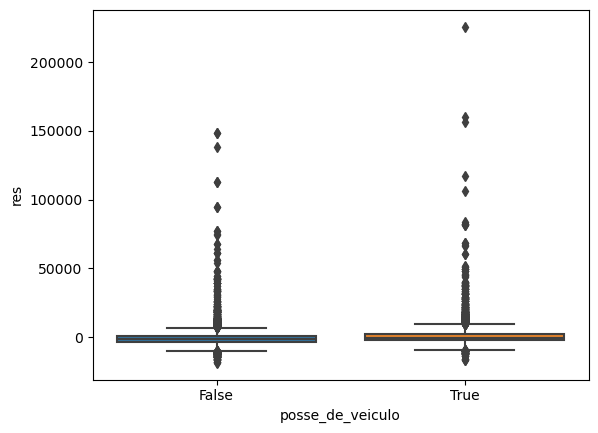

In [23]:
sns.boxplot(x = 'posse_de_veiculo', y = 'res', data = df)

<Axes: xlabel='is_empresario', ylabel='res'>

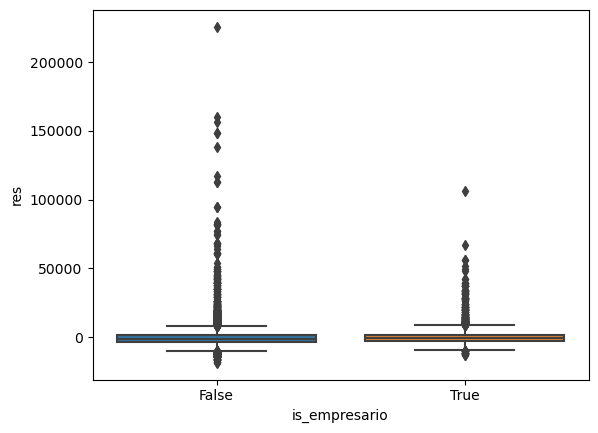

In [24]:
df['is_empresario'] = df['tipo_renda'] == 'Empresário'
sns.boxplot(x = 'is_empresario', y = 'res', data = df)

<Axes: xlabel='is_uniao', ylabel='res'>

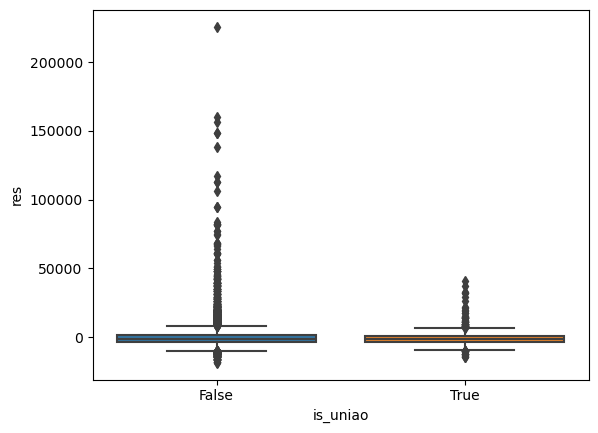

In [25]:
df['is_uniao'] = df['estado_civil'] == 'União'
sns.boxplot(x = 'is_uniao', y = 'res', data = df)

#### Numéricas:

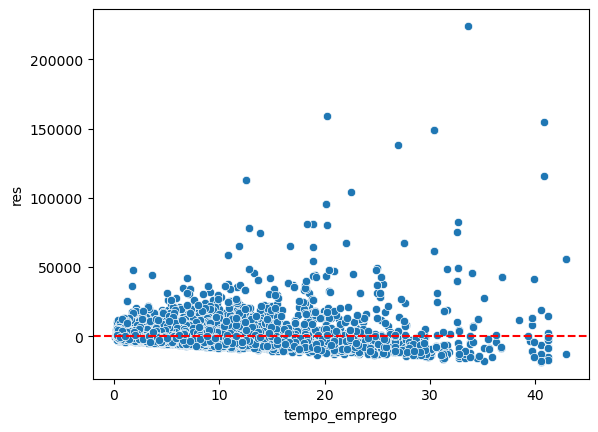

In [26]:
df['res'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

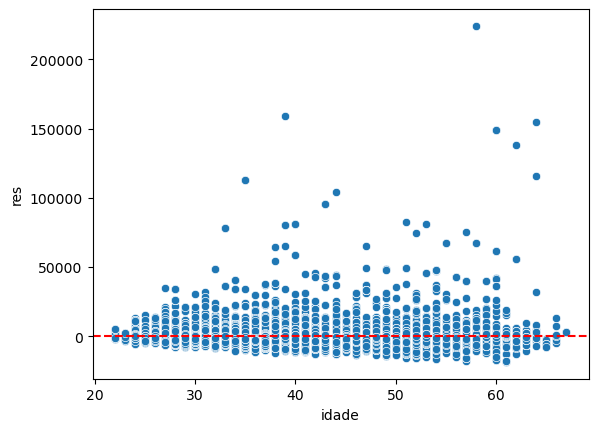

In [27]:
sns.scatterplot(x = 'idade', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='qtd_filhos', ylabel='res'>

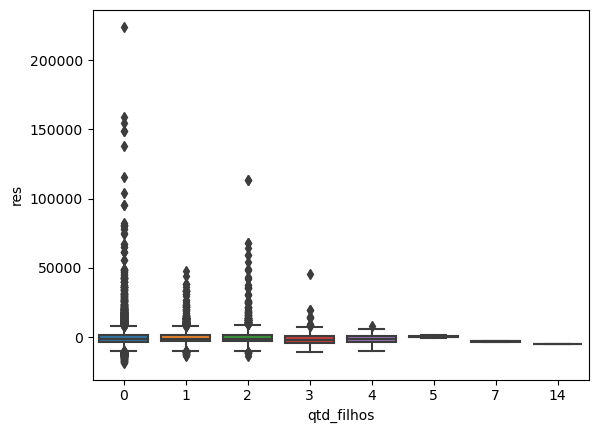

In [28]:
sns.boxplot(x = 'qtd_filhos', y = 'res', data = df)

<Axes: xlabel='qt_pessoas_residencia', ylabel='res'>

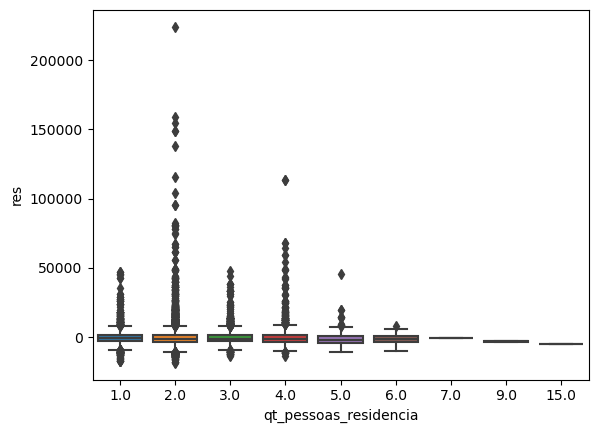

In [29]:
sns.boxplot(x = 'qt_pessoas_residencia', y = 'res', data = df)

#### <span style="color: blue;"> Avaliação: </span>
O ajuste está bem realizado. Podemos concluir isso, pois nos gráficos gerados em box-plot não temos nenhum valor das variáveis se destacando dos outros (desconsiderando os valores outliers) e nos gráficos de dispersão observamos um movimento similar (especialmente no gráfico de idade), mais uma vez, desconsiderando os outliers.